In [1]:
import time
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from hs_core.views.utils import authorize, ACTION_TO_AUTHORIZE
from django.contrib.auth.models import *
from selenium.webdriver.common.by import By

The code here is all written to be run multiple times. So that it's easy to update code here, or in the actual test class. Some of this is ugly, but this is just for development.

In [25]:
try:
    User.objects.get(username='user30', email='user30@example.com').delete()
    BaseResource.objects.get(title='Selenium resource creation test').delete()
except:
    pass

Reload the test module from disk. This will likely not be perfect and you may need to restart your notebook kernel and/or geckodriver to clear state, but it works pretty well.

In [26]:
import theme.tests.multiplatform as mp
from theme.tests import functional
reload(mp)
reload(functional)

<module 'theme.tests.functional' from 'theme/tests/functional.pyc'>

Create the firefox driver outside of the test case now (if we don't pass one in the tests will). This is so we don't constantly need new windows popping around and we don't use useful context while debugging.

In [30]:
if locals().has_key('driver'):
    driver.quit()
driver = mp.create_driver('desktop', 'docker')

Create a class based on our test class, but:
* Override the browser to use our ``manage.py runserver`` server.
* Don't actually run the tests ``runTest`` is blank
* We will instatiate that class and codename it ``self`` so that we can copy code back and forth easily to the tests file
* Make sure you adjust ``live_server_url`` to point to an accessible version of the server.

In [34]:
class jupyterTests(functional.DesktopTests):
    runTest = lambda _: _
    live_server_url = 'http://127.0.0.1:8000'
dt = jupyterTests()
self = dt
self.setUp(driver=driver)

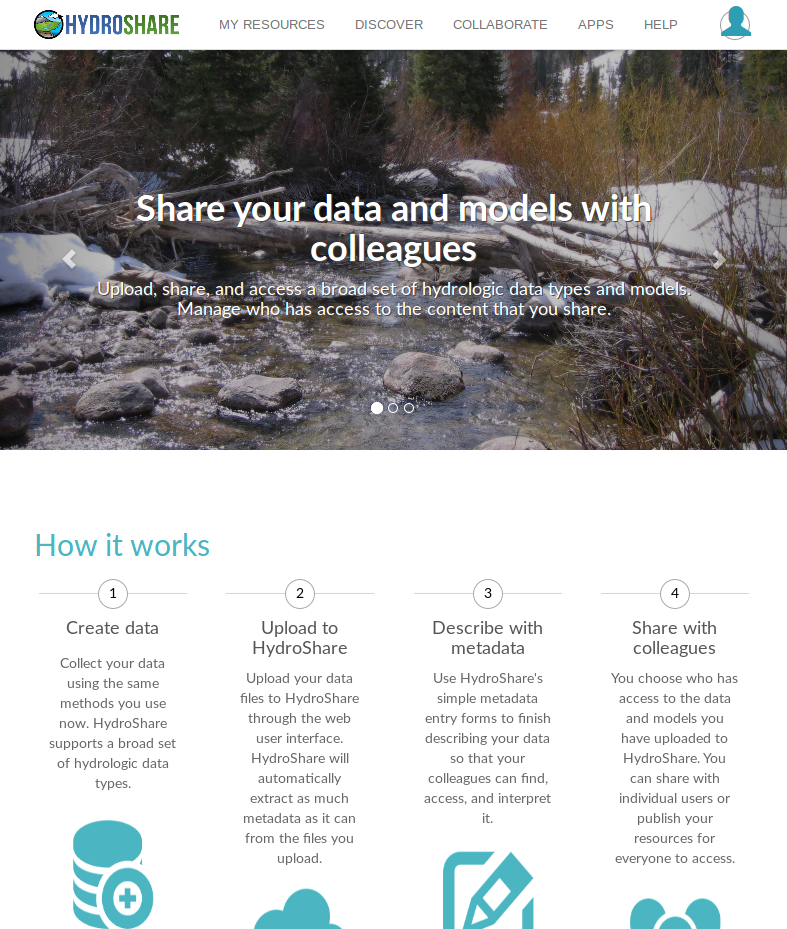

In [35]:
Image(self.driver.get_screenshot_as_png())

In [33]:
dt._login_helper(dt.user.email, dt.user_password)